# Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder




# Read Data

In [33]:
cols = ["Date","Rented Bike Count","Hour","Temperature(C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)","Dew point temperature(�C)","Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)","Seasons","Holiday","Functioning Day"]
df = pd.read_csv('SeoulBikeData.csv', names = cols)

In [38]:
label_encoder = {}
for col in cols[:-1]:
    label_encoder[col] = LabelEncoder()
    df[col] = label_encoder[col].fit_transform(df[col])
    label_encoder[col] = label_encoder

In [39]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,365,2166,24,546,90,65,1789,556,345,61,51,1,0,0
1,11,1267,0,115,28,22,1021,95,0,0,0,4,1,1
2,11,965,1,118,29,8,1021,95,0,0,0,4,1,1
3,11,715,12,123,30,10,1021,96,0,0,0,4,1,1
4,11,77,17,125,31,9,1021,95,0,0,0,4,1,1


In [35]:
df["Functioning Day"] = (df["Functioning Day"] == "Yes").astype(int) #Changing the data to int

In [36]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,0
1,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,1
2,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,1
3,01/12/2017,173,2,-6,39,1,2000,-17.7,0,0,0,Winter,No Holiday,1
4,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,1


# Visualize data

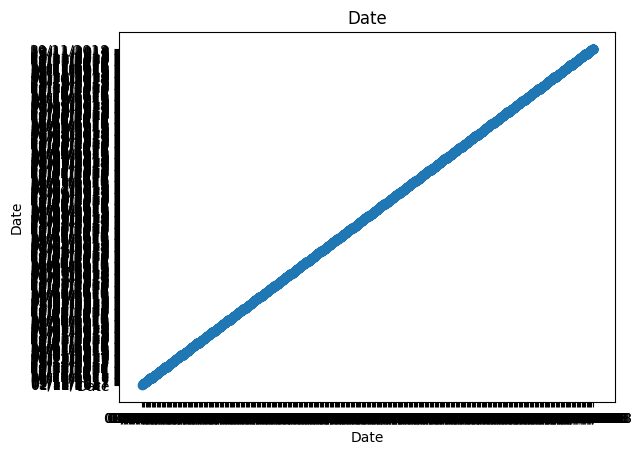

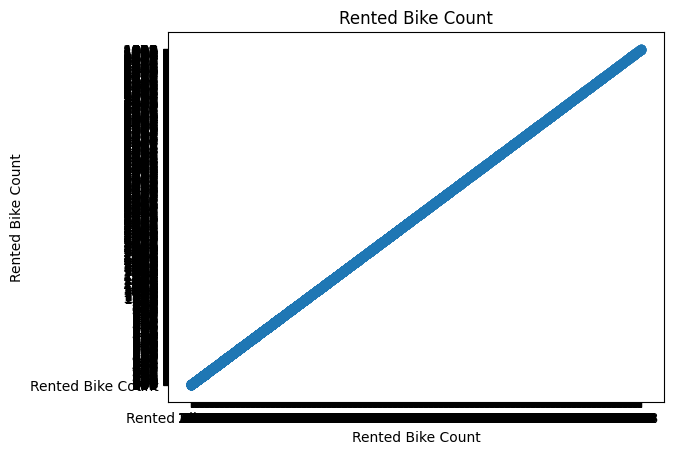

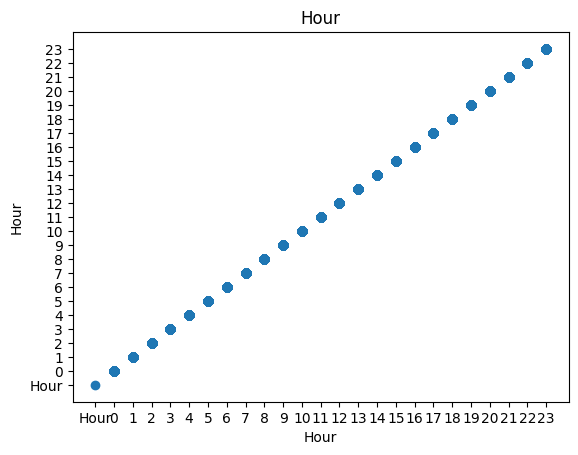

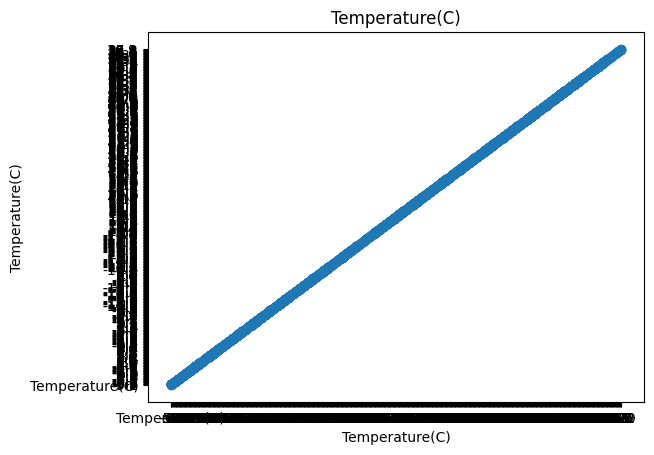

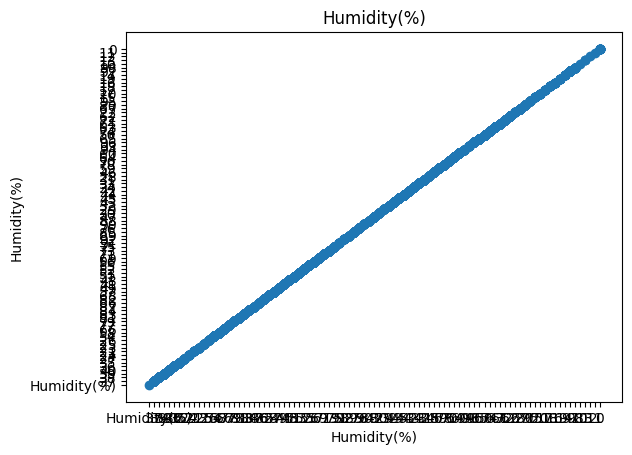

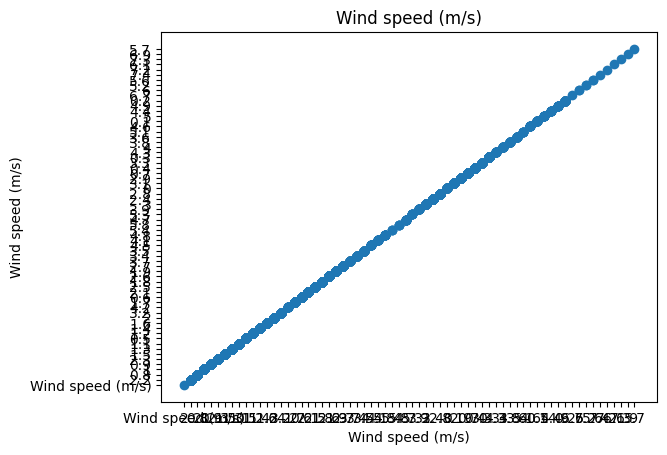

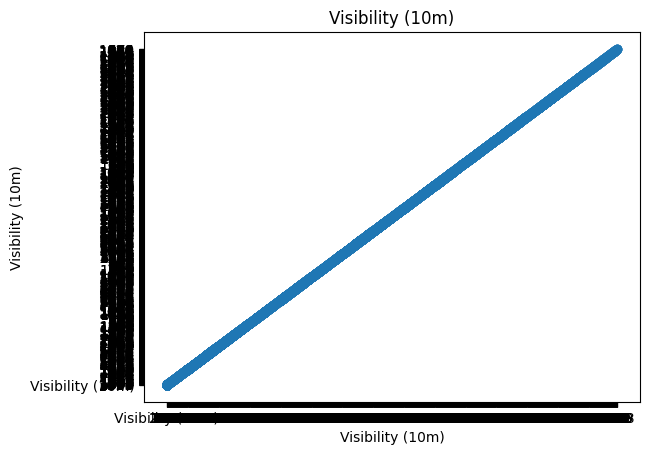

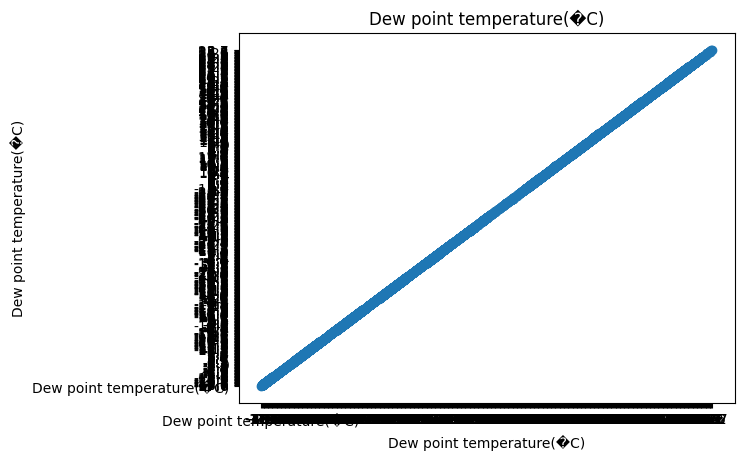

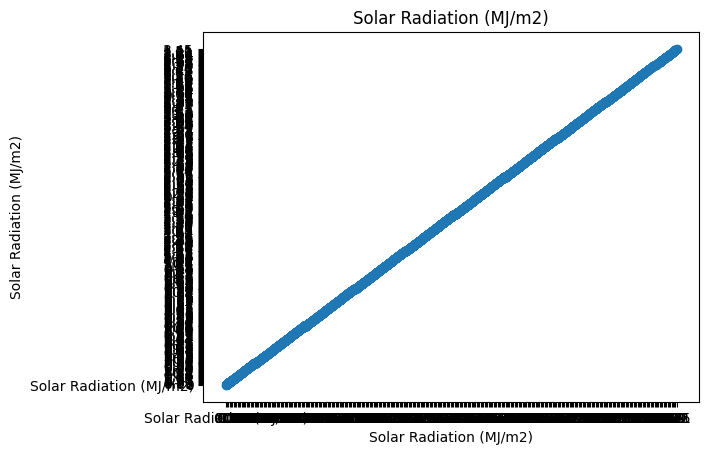

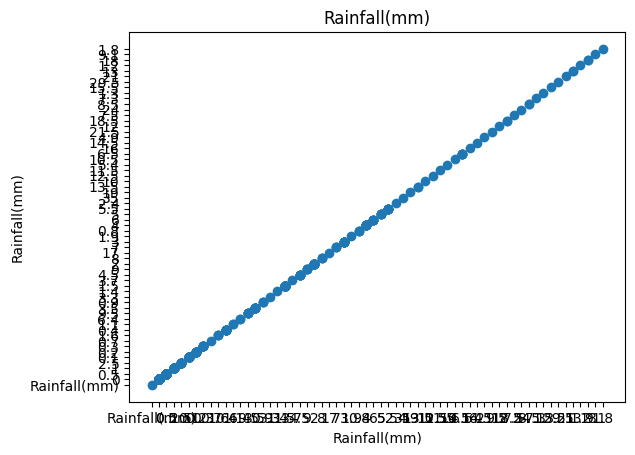

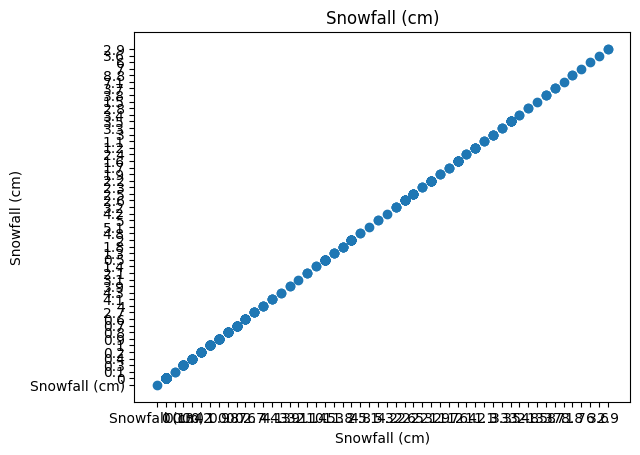

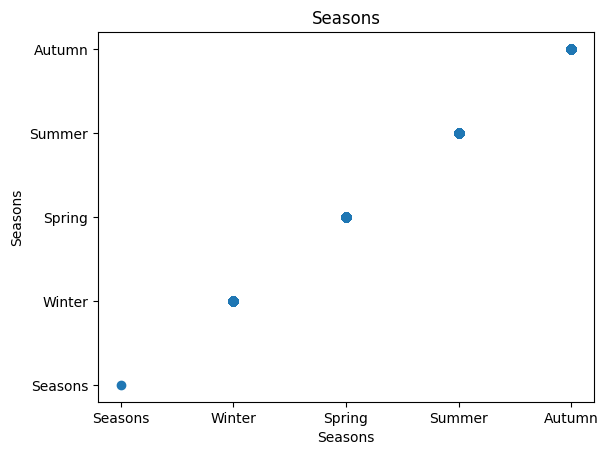

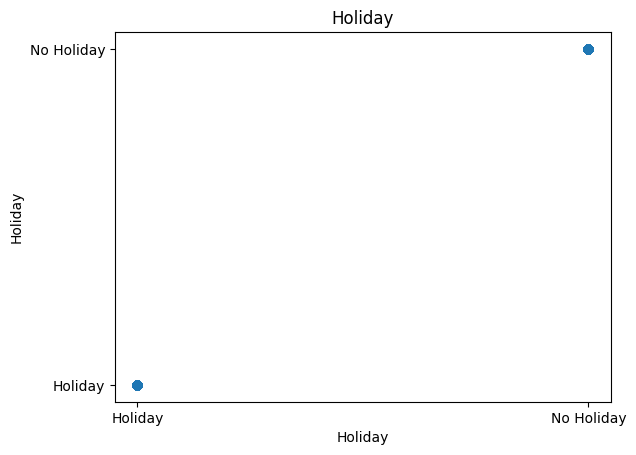

In [37]:
for label in cols[:-1]:
    plt.scatter(df[label], df[label])
    plt.xlabel(label)
    plt.ylabel(label)
    plt.title(label)
    plt.show()


# Train, Valid, Test

In [40]:
train, valid, test  = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [41]:
def scale_dataset(dataframe):
    y = dataframe[dataframe.columns[-1]]
    x = dataframe[dataframe.columns[:-1]]
    data = pd.concat([x,y], axis=1)

    return data,x,y



In [42]:
train, x_train, y_train = scale_dataset(train)
valid, x_valid, y_valid = scale_dataset(valid)
test,x_test, y_test = scale_dataset(test)

In [27]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,365,2166,24,546,90,65,1789,556,345,61,51,1,0,0
1,11,1267,0,115,28,22,1021,95,0,0,0,4,1,1
2,11,965,1,118,29,8,1021,95,0,0,0,4,1,1
3,11,715,12,123,30,10,1021,96,0,0,0,4,1,1
4,11,77,17,125,31,9,1021,95,0,0,0,4,1,1


In [30]:
print(cols)

['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [43]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred = lr_model.predict(x_test)


In [51]:
print(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [53]:
print(y_pred)

[0.92813219 0.83168238 0.9475183  ... 0.8801849  1.0626206  1.03800197]


In [54]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,365,2166,24,546,90,65,1789,556,345,61,51,1,0,0
1,11,1267,0,115,28,22,1021,95,0,0,0,4,1,1
2,11,965,1,118,29,8,1021,95,0,0,0,4,1,1
3,11,715,12,123,30,10,1021,96,0,0,0,4,1,1
4,11,77,17,125,31,9,1021,95,0,0,0,4,1,1
